In [1]:
import numpy as np  
import pandas as pd  
  

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 
 


/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_zipcode_population.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_data_dictionary.csv


In [3]:
telecom=pd.read_csv('/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv')

In [4]:
telecom


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [6]:
telecom.groupby('Customer Status')['Monthly Charge'].describe()   

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,73.347592,26.373764,-10.0,55.3000,79.500,94.20,118.35
Joined,454.0,42.775991,24.612329,-8.0,20.1625,43.975,64.35,107.95
Stayed,4720.0,61.737415,32.198758,-10.0,25.1000,65.600,89.55,118.75


In [12]:
telecom.groupby('Customer Status')['Total Charges'].describe()   

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,1531.796094,1890.822994,18.85,134.5000,703.550,2331.3000,8684.80
Joined,454.0,79.292731,67.286088,18.80,25.2500,51.425,107.2125,335.75
Stayed,4720.0,2788.516831,2302.593725,55.70,834.4125,1940.825,4540.1750,8672.45


In [13]:
telecom.describe()


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [16]:
telecom.groupby(['Customer Status','Gender'])['Total Charges'].describe()   

count         mean          std    min       25%  \
Customer Status Gender                                                      
Churned         Female   939.0  1440.979499  1777.926268  19.10  143.7500   
                Male     930.0  1623.491559  1995.121272  18.85  114.7375   
Joined          Female   211.0    81.078910    65.520748  18.85   29.8750   
                Male     243.0    77.741770    68.879435  18.80   21.0000   
Stayed          Female  2338.0  2816.507613  2326.597829  62.90  818.8625   
                Male    2382.0  2761.043090  2278.941427  55.70  846.9125   

                             50%        75%      max  
Customer Status Gender                                
Churned         Female   663.050  2222.1250  8127.60  
                Male     740.150  2448.5500  8684.80  
Joined          Female    55.300   114.0500   293.15  
                Male      50.050    96.9250   335.75  
Stayed          Female  1930.725  4615.7375  8672.45  
                Male    1954.675  4477.5000  8594.40

In [17]:
telecom.groupby('Gender')['Number of Referrals'].describe()   

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,3488.0,1.979358,3.010093,0.0,0.0,0.0,3.0,10.0
Male,3555.0,1.924895,2.992626,0.0,0.0,0.0,3.0,11.0


In [18]:
import seaborn as sbn

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: xlabel='Tenure in Months', ylabel='Monthly Charge'>

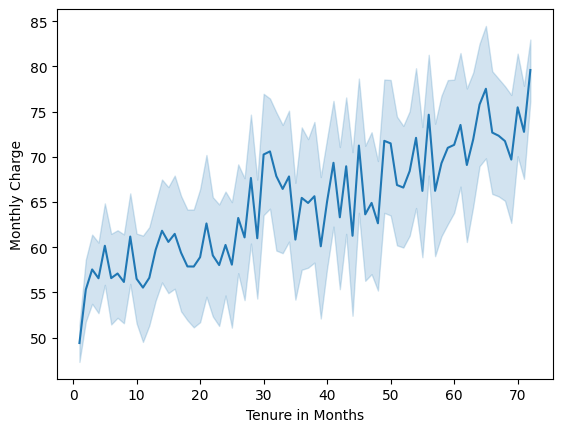

In [19]:
sbn.lineplot(x='Tenure in Months', y='Monthly Charge', data=telecom)

<AxesSubplot: xlabel='Customer Status', ylabel='count'>

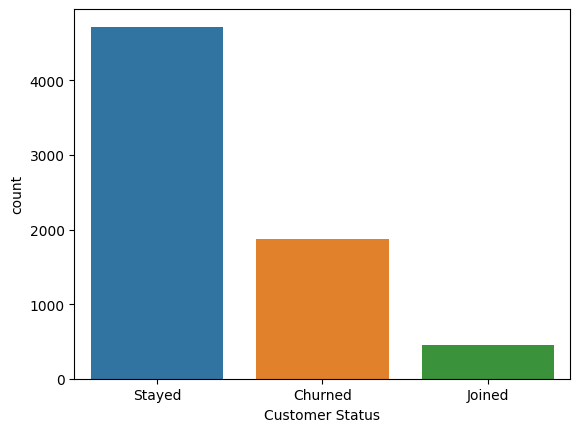

In [25]:
sbn.countplot(x='Customer Status',  data=telecom)

<AxesSubplot: xlabel='Customer Status', ylabel='Monthly Charge'>

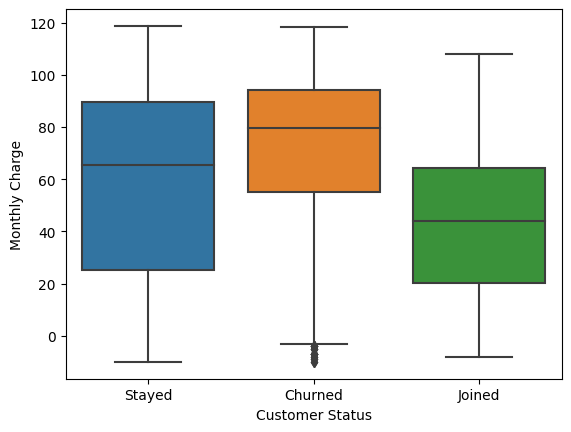

In [28]:
sbn.boxplot(x='Customer Status', y='Monthly Charge', data=telecom)